declare library

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report, accuracy_score


Create column_names include all the header need to add to the data file, then read the data file and and replace the first row by the name of the column. 

In [59]:
# Create column_names
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Load datasets
train_data = pd.read_csv('adult.csv', header=None, names=column_names, skipinitialspace=True)
test_data = pd.read_csv('test.csv', header=None, names=column_names, skipinitialspace=True)

# check datasets
print("This is traindata have name columns : " , '\n' , train_data)
print("This is testdata have name columns : " , '\n' , test_data)

This is traindata have name columns :  
        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male  

Check data information

In [60]:
train_data.info

<bound method DataFrame.info of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      

Handing missing values

In [61]:
# Normalize the target labels in both datasets
train_data['income'] = train_data['income'].str.strip('.')
test_data['income'] = test_data['income'].str.strip('.')
# Replace '?' with NaN for handling missing values
train_data.replace('?', np.nan, inplace=True)
test_data.replace('?', np.nan, inplace=True)
#check for missing value
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()
print("Missing Values in Training Data:\n", missing_train[missing_train > 0])
print("Missing Values in Test Data:\n", missing_test[missing_test > 0])

Missing Values in Training Data:
 workclass         1836
occupation        1843
native-country     583
dtype: int64
Missing Values in Test Data:
 workclass         963
occupation        966
native-country    274
dtype: int64


Fill mising values

In [62]:
for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

In [63]:
#check for missing value
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()
print("Missing Values in Training Data:\n", missing_train[missing_train > 0])
print("Missing Values in Test Data:\n", missing_test[missing_test > 0])

Missing Values in Training Data:
 Series([], dtype: int64)
Missing Values in Test Data:
 Series([], dtype: int64)


Encoding data with label_encoder

In [64]:
label_encoders = {}
for col in train_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])
    label_encoders[col] = le

Use feature Scaling to standardizes the numerical features by transforming them to have a mean of 0 and a standard deviation of 1

In [65]:
scaler = StandardScaler()
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

Perform data exploratory analysis with chart

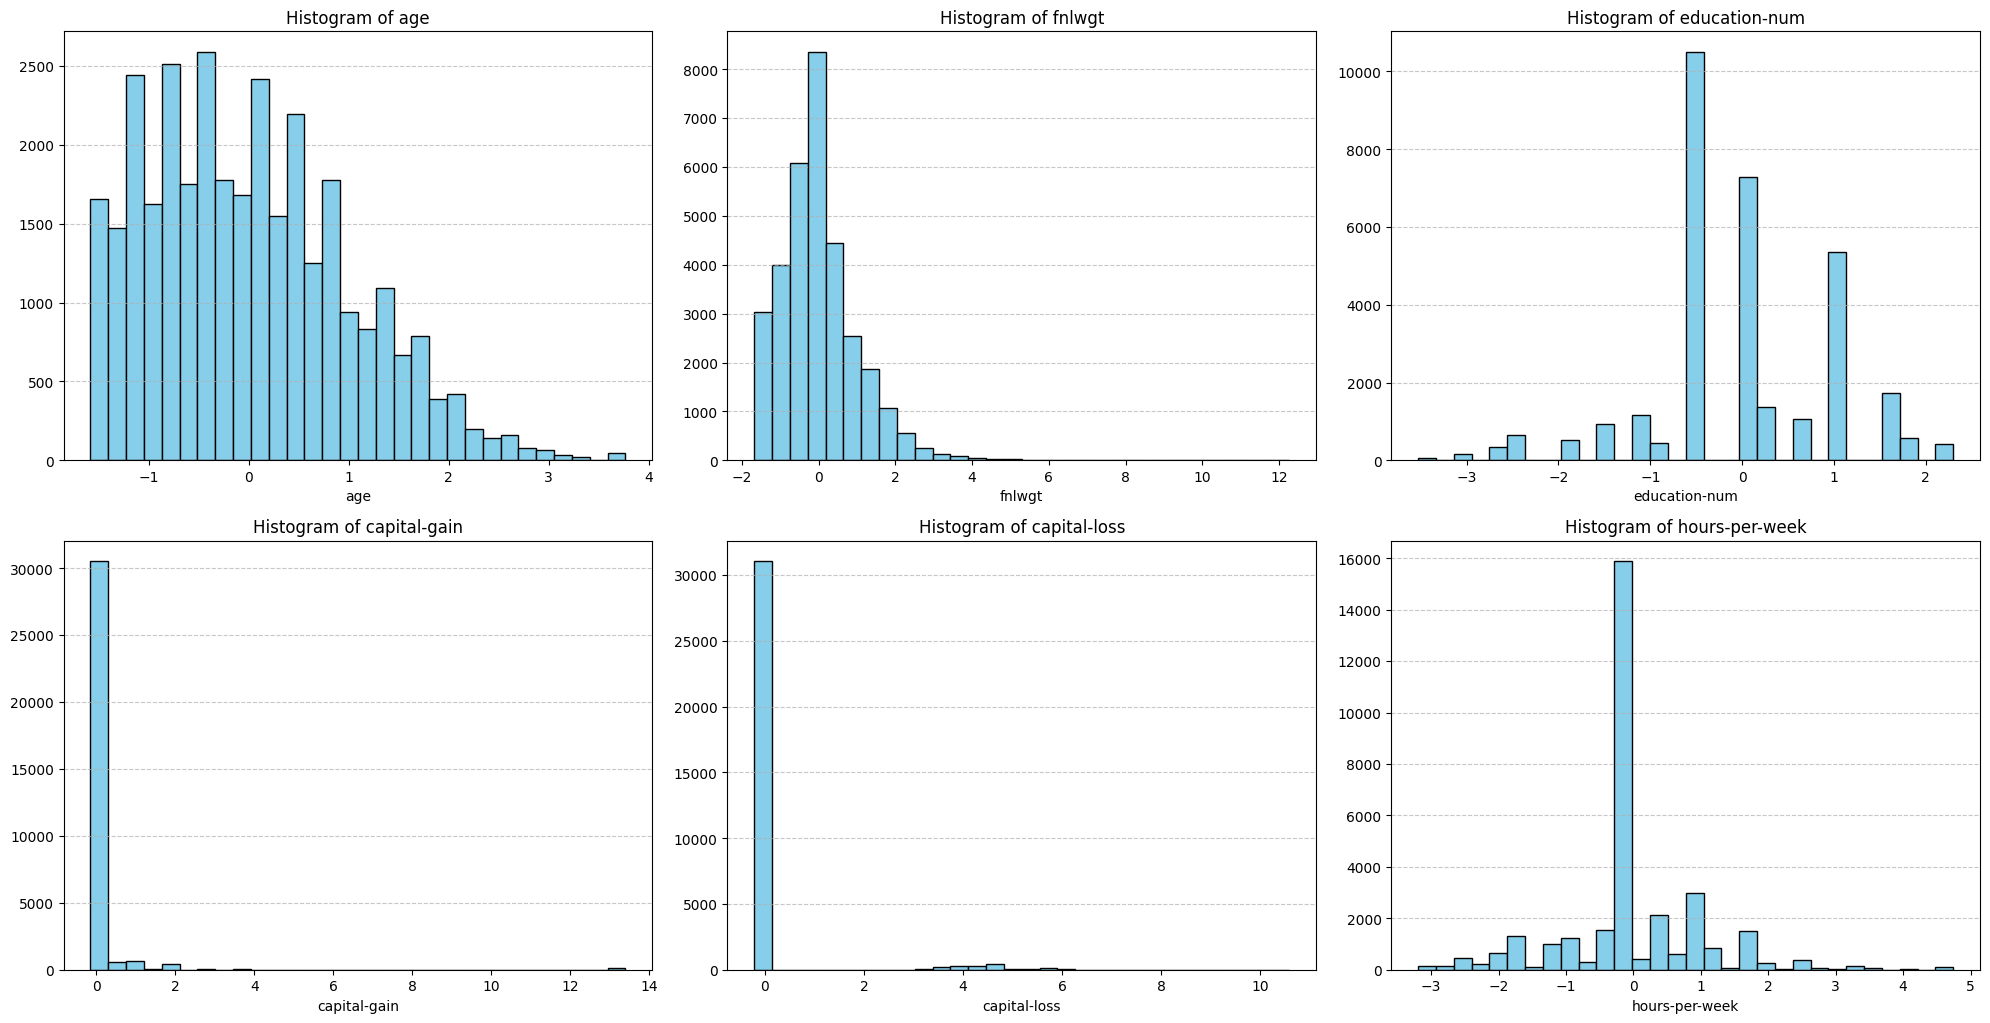

In [66]:
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Create a subplot for each numerical column
    plt.hist(train_data[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [67]:
train_data.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,3.256100e+04,32561.000000,3.256100e+04,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,3.256100e+04,3.256100e+04,3.256100e+04,32561.000000,32561.000000
mean,-2.705915e-17,3.094438,-1.001625e-16,10.298210,1.471887e-16,2.611836,6.138755,1.446362,3.665858,0.669205,1.309314e-17,1.016900e-16,-1.549355e-17,36.417155,0.240810
std,1.000015e+00,1.107194,1.000015e+00,3.870264,1.000015e+00,1.506222,3.972708,1.606771,0.848806,0.470506,1.000015e+00,1.000015e+00,1.000015e+00,6.056047,0.427581
min,-1.582206e+00,0.000000,-1.681631e+00,0.000000,-3.529656e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.459205e-01,-2.166595e-01,-3.194030e+00,0.000000,0.000000
25%,-7.757679e-01,3.000000,-6.816910e-01,9.000000,-4.200596e-01,2.000000,3.000000,0.000000,4.000000,0.000000,-1.459205e-01,-2.166595e-01,-3.542945e-02,38.000000,0.000000
50%,-1.159546e-01,3.000000,-1.082193e-01,11.000000,-3.136003e-02,2.000000,6.000000,1.000000,4.000000,1.000000,-1.459205e-01,-2.166595e-01,-3.542945e-02,38.000000,0.000000
75%,6.904838e-01,3.000000,4.478765e-01,12.000000,7.460392e-01,4.000000,9.000000,3.000000,4.000000,1.000000,-1.459205e-01,-2.166595e-01,3.695194e-01,38.000000,0.000000
max,3.769612e+00,7.000000,1.226856e+01,15.000000,2.300838e+00,6.000000,13.000000,5.000000,4.000000,1.000000,1.339458e+01,1.059351e+01,4.742967e+00,40.000000,1.000000


In [68]:
test_data.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,0.013622,3.110128,-0.003247,10.268841,-0.003021,2.632578,6.180947,1.437135,3.672440,0.667035,0.000576,0.001478,-0.003662,36.466679,0.236226
std,1.015320,1.117966,1.001578,3.882980,0.998004,1.510611,3.961058,1.592903,0.840327,0.471289,1.026913,1.000375,1.010698,5.982264,0.424776
min,-1.582206,0.000000,-1.670195,0.000000,-3.529656,0.000000,0.000000,0.000000,0.000000,0.000000,-0.145920,-0.216660,-3.194030,0.000000,0.000000
25%,-0.775768,3.000000,-0.692028,9.000000,-0.420060,2.000000,3.000000,0.000000,4.000000,0.000000,-0.145920,-0.216660,-0.035429,38.000000,0.000000
50%,-0.115955,3.000000,-0.113193,11.000000,-0.031360,2.000000,7.000000,1.000000,4.000000,1.000000,-0.145920,-0.216660,-0.035429,38.000000,0.000000
75%,0.690484,3.000000,0.460506,12.000000,0.746039,4.000000,9.000000,3.000000,4.000000,1.000000,-0.145920,-0.216660,0.369519,38.000000,0.000000
max,3.769612,7.000000,12.322519,15.000000,2.300838,6.000000,13.000000,5.000000,4.000000,1.000000,13.394578,9.139246,4.742967,40.000000,1.000000


Split data into Features and Target to get ready to train model

In [69]:
#Remove the 'income' column to create X-train to be a features data that include all the column except 'income'
X_train = train_data.drop('income', axis=1)
#
y_train = train_data['income']
X_test = test_data.drop('income', axis=1)
y_test = test_data['income']

Train model and compare models

In [70]:
# Models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(kernel='rbf', random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train each model
models = {'Logistic Regression': logistic_model, 'Decision Tree': tree_model, 
          'SVM': svm_model, 'Random Forest': rf_model}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

--- Logistic Regression ---
Accuracy: 0.8253792764572201

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     12435
           1       0.70      0.45      0.55      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.70      0.72     16281
weighted avg       0.81      0.83      0.81     16281

--- Decision Tree ---
Accuracy: 0.8086726859529513

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87     12435
           1       0.59      0.61      0.60      3846

    accuracy                           0.81     16281
   macro avg       0.74      0.74      0.74     16281
weighted avg       0.81      0.81      0.81     16281

--- SVM ---
Accuracy: 0.8134021251765862

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89     12435
           1 

Train a random forest classifier

In [71]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print(model)

RandomForestClassifier(random_state=42)


Evalute the Model

In [72]:
y_pred = rf_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8549843375714022

Confusion Matrix:
 [[11563   872]
 [ 1489  2357]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     12435
           1       0.73      0.61      0.67      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.77      0.79     16281
weighted avg       0.85      0.85      0.85     16281



Feature Importance

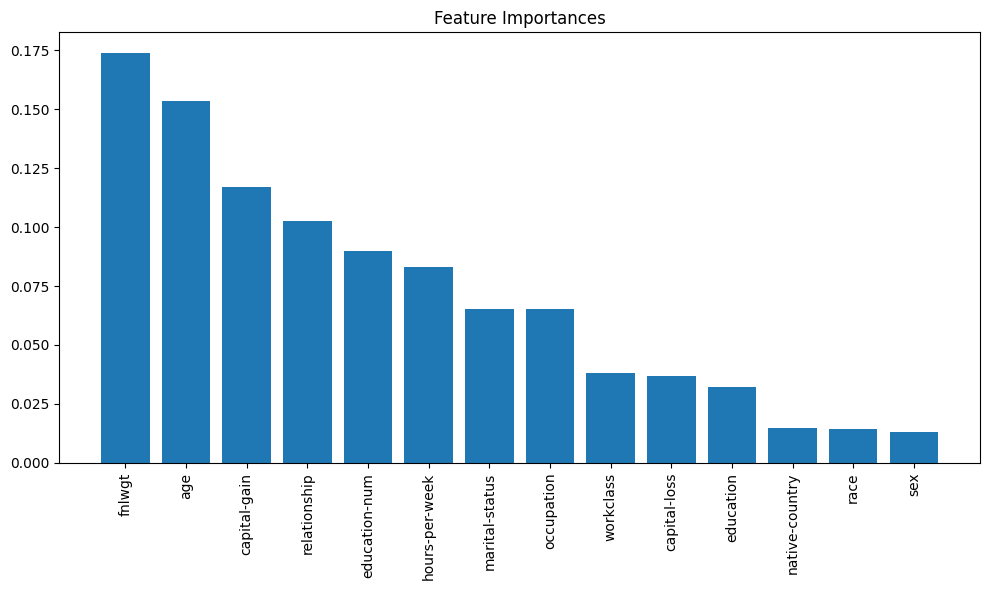

In [73]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

Confusion Matrix

<Figure size 800x600 with 0 Axes>

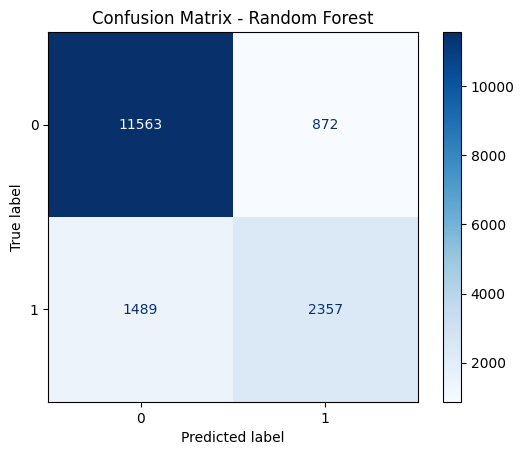

In [76]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

ROC Curve and AUC

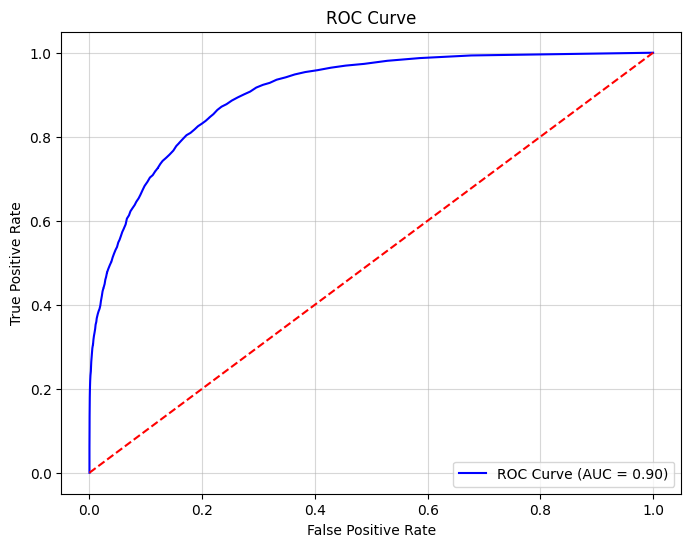

In [87]:
# Evaluate probabilities for ROC curve
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class '1'

# Compute False Positive Rate (FPR) and True Positive Rate (TPR) for ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()